# Exercises: Instability of Parameter Estimates

## Lecture Link

This exercise notebook refers to this lecture. Please use the lecture for explanations and sample code.

https://www.quantopian.com/lectures#Instability-of-Estimates

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,8)
import pandas as pd
from statsmodels.stats.stattools import jarque_bera

# Set a seed so we can play with the data without generating new random numbers every time
np.random.seed(123)

# Exercise 1: Sample Size vs. Standard Deviation

Using the below normal distribution with mean 100 and standard deviation 50, find the means and standard deviations of  samples of size 5, 25, 100, and 500.

In [3]:
sample_sizes = [5, 25, 100, 500]

#Your code goes here
for s in sample_sizes:
    print('Mean (n=' + str(s) + '): ', np.mean(np.random.normal(100,50,s)))
    print('Stdev (n=' + str(s) + '): ', np.std(np.random.normal(100,50,s)))
    print('\n')

Mean (n=5):  81.09798375448389
Stdev (n=5):  74.24359370719138


Mean (n=25):  98.87684769755779
Stdev (n=25):  53.99123419339078


Mean (n=100):  100.36872858912955
Stdev (n=100):  46.786522392922656


Mean (n=500):  100.44164310067455
Stdev (n=500):  48.95542201376688




# Exercise 2: Instability of Predictions on Mean Alone

## a. Finding Means

Find the means of the following three data sets $X$, $Y$, and $Z$.

In [8]:
X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]

#Your code goes here
mean_x = np.mean(X)
mean_y = np.mean(Y)
mean_z =np.mean(Z)
print(mean_x)
print(mean_y)
print(mean_z)

25.0
24.686274509803923
25.607843137254903


## b. Checking for Normality

Use the `jarque_bera` function to conduct a Jarque-Bera test on $X$, $Y$, and $Z$ to determine whether their distributions are normal. 

In [7]:
#Your code goes here
#output p-values
print(jarque_bera(X)[1])
print(jarque_bera(Y)[1])
print(jarque_bera(Z)[1])

print('p-values > 0.05 --> reject null (not normal)')

0.21602637949153217
0.25028131217047933
0.8669070017626075
p-values > 0.05 --> reject null (not normal)


## c. Instability of Estimates

Create a histogram of the sample distributions of $X$, $Y$, and $Z$ along with the best estimate/mean based on the sample.

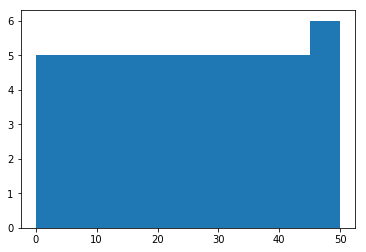

In [19]:
#Your code goes here
plt.hist(X);

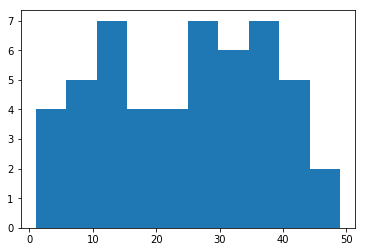

In [15]:
plt.hist(Y);

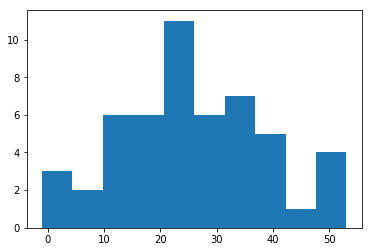

In [16]:
plt.hist(Z);

# Exercise 3: Sharpe Ratio Window Adjustment

## a. Effect on Variability

Just as in the lecture, find the mean and standard deviation of the running sharpe ratio for THO, this time testing for multiple window lengths: 300, 150, and 50. Restrict your mean and standard deviation calculation to pricing data up to 200 days away from the end.

Mean of running 50 Day Sharpe ratio: 0.04129645813407394
std of running 50 Day Sharpe ratio: 0.1310284494340667


Mean of running 150 Day Sharpe ratio: 0.0457806145600654
std of running 150 Day Sharpe ratio: 0.06651211983407826


Mean of running 300 Day Sharpe ratio: 0.042229700780425795
std of running 300 Day Sharpe ratio: 0.041364055420886614




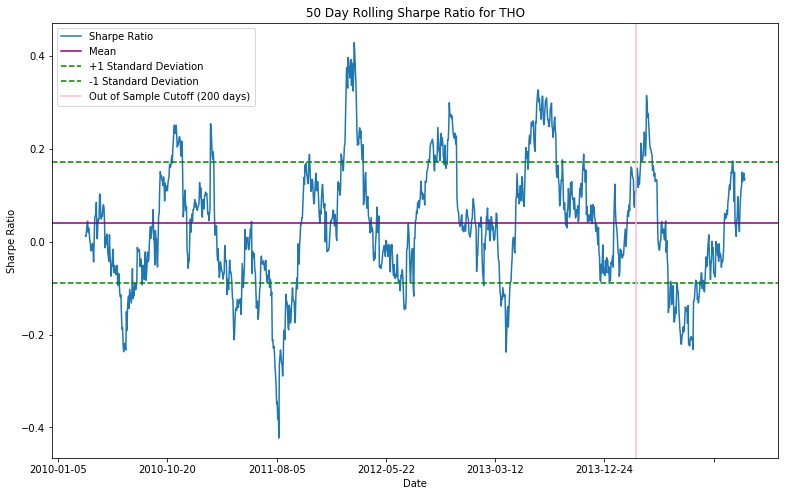

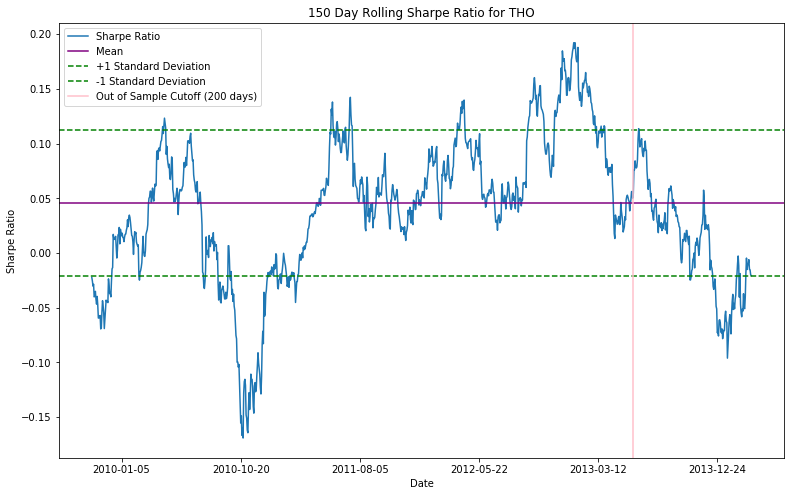

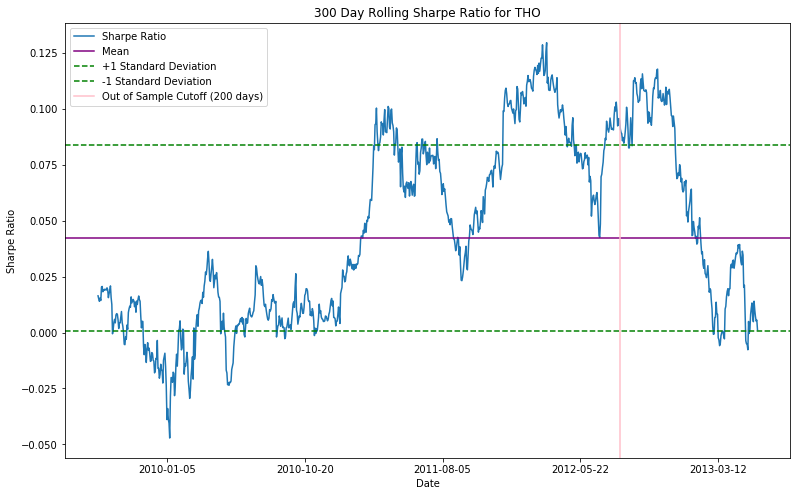

In [33]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

from pandas_datareader import data
start = '2010-01-01'
end = '2015-01-01'

treasury_ret = data.DataReader('BIL', 'yahoo', start, end)['Adj Close'].pct_change()[1:]
tho_returns = data.DataReader('THO', 'yahoo', start, end)['Adj Close'].pct_change()[1:]

#Your code goes here
def running_sharpe(base_asset, risk_free_asset, window):
     return [sharpe_ratio(base_asset[i-window:i], risk_free_asset[i-window:i]) for i in range(window, len(base_asset))]
    
sharpe50 = running_sharpe(tho_returns, treasury_ret, 50)
sharpe150 = running_sharpe(tho_returns, treasury_ret, 150)
sharpe300 = running_sharpe(tho_returns, treasury_ret, 300)

def plot_running_sharpe(running_sharpe, window):
    # Compute the mean and std of the running Sharpe ratios up to 200 days before the end
    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])

    # Plot running Sharpe ratio
    _, ax2 = plt.subplots()
    ax2.set_xticklabels([tho_returns.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
    ax2.plot(range(window, len(tho_returns)), running_sharpe)

    # Plot its mean and the +/- 1 standard deviation lines
    ax2.axhline(mean_rs, color='purple')
    ax2.axhline(mean_rs + std_rs, linestyle='--', color='green')
    ax2.axhline(mean_rs - std_rs, linestyle='--', color='green')

    # Indicate where we computed the mean and standard deviations
    # Everything after this is 'out of sample' which we are comparing with the estimated mean and std
    ax2.axvline(len(tho_returns) - 200, color='pink');
    plt.title(str(window) + ' Day Rolling Sharpe Ratio for THO')
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
    plt.legend(['Sharpe Ratio', 'Mean', '+1 Standard Deviation','-1 Standard Deviation','Out of Sample Cutoff (200 days)'])

    print('Mean of running ' + str(window) + ' Day Sharpe ratio:', mean_rs)
    print('std of running ' + str(window) + ' Day Sharpe ratio:', std_rs)
    print('\n')
    
plot_running_sharpe(sharpe50, 50)
plot_running_sharpe(sharpe150, 150)
plot_running_sharpe(sharpe300, 300)

## b. Out-of-Sample Instability

Plot the running sharpe ratio of all three window lengths, as well as their in-sample mean and standard deviation bars.

In [ ]:
#Your code goes here
#above

# Exercise 4: Weather

## a. Temperature in Boston

Find the mean and standard deviation of Boston weekly average temperature data for the year of 2015 stored in `b15_df`. 

In [35]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

#Your code goes here
b15_mean = np.mean(b15_df['Weekly Avg Temp'])
b15_std = np.std(b15_df['Weekly Avg Temp'])

print('mean: ', b15_mean)
print('stdev: ', b15_std)

mean:  49.07692307692308
stdev:  22.983979498978574


## b. Temperature in Palo Alto

Find the mean and standard deviation of Palo Alto weekly average temperature data for the year of 2015 stored in `p15_df`.

In [36]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here
p15_mean = np.mean(p15_df['Weekly Avg Temp'])
p15_std = np.std(p15_df['Weekly Avg Temp'])

print('mean: ', p15_mean)
print('stdev: ', p15_std)

mean:  59.78846153846154
stdev:  7.974325480183593


## c. Predicting 2016 Temperatures

Use the means you found in parts a and b to attempt to predict  2016 temperature data for both cities. Do this by creating two histograms for the 2016 temperature data in `b16_df` and `p16_df` with a vertical line where the 2015 means were to represent your prediction.

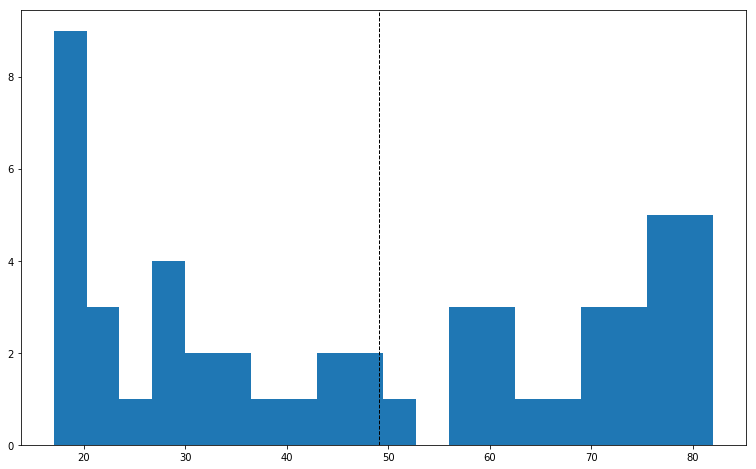

In [53]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here
plt.hist(b16_df['Weekly Avg Temp'], bins=20)
plt.axvline(b15_mean, color='k', linestyle='dashed', linewidth=1);

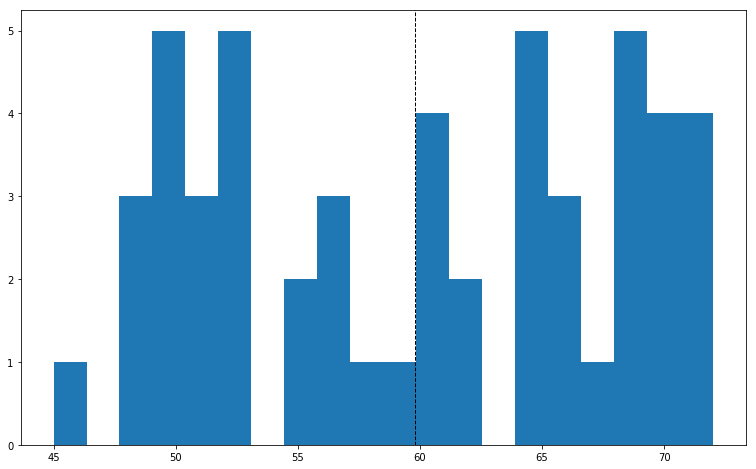

In [54]:
plt.hist(p16_df['Weekly Avg Temp'], bins=20)
plt.axvline(p15_mean, color='k', linestyle='dashed', linewidth=1);

---

Congratulations on completing the instability of parameter estimates exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solic
itation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*